In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
%matplotlib inline
import tensorflow as tf
# import seaborn as sns
from sklearn.model_selection import train_test_split
from keras.models import Model, load_model
from keras.layers import Input, Dense
from keras.callbacks import ModelCheckpoint
from keras import regularizers
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import roc_curve, auc, precision_recall_curve

//anaconda3/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: compiletime version 3.6 of module 'tensorflow.python.framework.fast_tensor_util' does not match runtime version 3.7
  return f(*args, **kwds)
Using TensorFlow backend.


In [3]:
cdata = pd.read_csv("NY clean.csv")

In [4]:
cdata.shape

(1070994, 79)

In [5]:
cdata.head(5).transpose()

,0,1,2,3,4
Unnamed: 0,0.000000,1.000000,2.000000,3.000000,4.000000
STORIES,-0.177236,-0.238036,-0.238036,-0.359637,-0.481238
FULLVAL,1.769927,16.640395,8.953812,3.305277,23.411461
AVLAND,1.020213,3.505539,9.592535,3.738434,29.811617
AVTOT,1.366038,12.639995,6.812458,2.530054,17.773438
...,...,...,...,...,...
VT3-d-1,0.451410,1.458999,-0.008512,0.055411,10.333575
VT3-d-2,0.498693,1.660249,-0.031507,0.042183,11.890914
VT3-d-3,0.042385,0.158338,-0.010543,-0.003187,1.179621
VT3-d-4,0.469796,1.106279,-0.141426,-0.057566,0.478405


In [ ]:
#prepare the data

In [6]:
del cdata['Unnamed: 0']

In [7]:
cdata_45 = cdata.loc[:,"lotarea-d-1":].values

In [8]:
# pca 

In [14]:
from sklearn.decomposition import PCA
pca_cdata_model1 = PCA(0.85)
pca_cdata1 = pca_cdata_model1.fit_transform(cdata_45)
pca_cdata = pd.DataFrame(pca_cdata1)

In [15]:
pca_cdata.shape

(1070994, 7)

In [11]:
pca_cdata.head(10)

,0,1,2,3,4,5,6
0,2.961066,-0.966778,-0.144025,-1.069115,3.949256,0.149773,-0.024679
1,22.082460,88.952050,0.771002,-12.961086,-5.031805,52.759906,-40.767609
2,-0.045503,0.121442,3.984966,0.286080,2.341590,0.601933,0.319356
3,0.274976,-0.346367,0.239236,0.094751,2.826759,0.477089,0.424602
4,37.755544,-5.516241,-0.082214,6.282805,4.213788,-5.911139,-12.896729
5,3.482633,-0.422903,-0.231386,0.939326,0.195036,-0.682766,-1.239635
6,19.388915,-3.464164,-0.277231,3.498930,1.111200,-3.444969,-6.896603
7,1.381727,0.841660,0.061423,-0.400549,0.324203,0.407827,-0.746156
8,-0.230427,-0.402599,3.992211,0.069870,1.450999,0.254829,0.323462
9,-0.215400,-0.374251,3.992308,0.043130,1.449014,0.271268,0.312997


In [ ]:
# z-scale after pca & calculating zscore

In [18]:
pca_cdata = StandardScaler().fit_transform(pca_cdata)
normalised_pca_cdata = pd.DataFrame(pca_cdata)
s1_list = []
for row in normalised_pca_cdata.values:
    s1 =math.sqrt(sum([i*i for i in row]))
    s1_list.append(s1)
normalised_pca_cdata['s1'] = s1_list 
# def square(x): return lambda : x*x
# listOfLambdas = [square(i) for i in ]
# normalised_pca_cdata['s1'] = np.sqrt(x in normalised_pca_cdata.iterrows lambda x : x**2)



In [19]:
normalised_pca_cdata.head(10)

,0,1,2,3,4,5,6,s1
0,0.684644,-0.305740,-0.048537,-0.484217,2.002091,0.085737,-0.015945,2.194313
1,5.105808,28.130779,0.259830,-5.870258,-2.550893,30.202362,-26.339824,49.642860
2,-0.010521,0.038406,1.342945,0.129570,1.187078,0.344576,0.206335,1.841829
3,0.063579,-0.109537,0.080623,0.042914,1.433037,0.273109,0.274334,1.492590
4,8.729668,-1.744492,-0.027706,2.845571,2.136196,-3.383826,-8.332536,13.145082
5,0.805239,-0.133742,-0.077978,0.425434,0.098874,-0.390849,-0.800924,1.287396
6,4.483019,-1.095530,-0.093428,1.584715,0.563327,-1.972069,-4.455874,6.919458
7,0.319477,0.266172,0.020700,-0.181414,0.164356,0.233460,-0.482089,0.721234
8,-0.053278,-0.127320,1.345386,0.031645,0.735590,0.145877,0.208988,1.560821
9,-0.049804,-0.118356,1.345419,0.019534,0.734584,0.155287,0.202226,1.559373


In [ ]:
# plot s1 

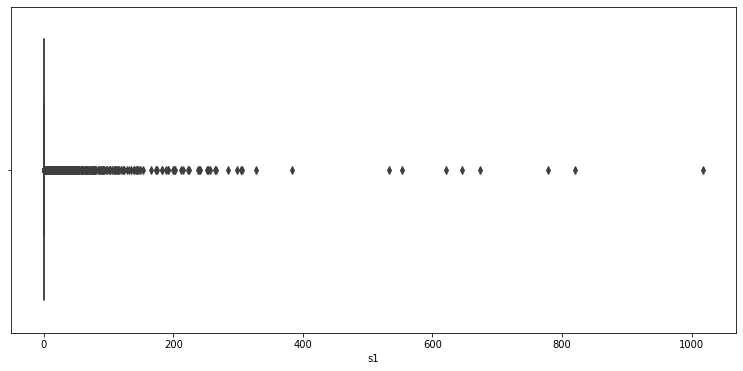

In [20]:
plt.figure(figsize=(13, 6))
sns.boxplot(x='s1', data=normalised_pca_cdata)

<function matplotlib.pyplot.show(*args, **kw)>

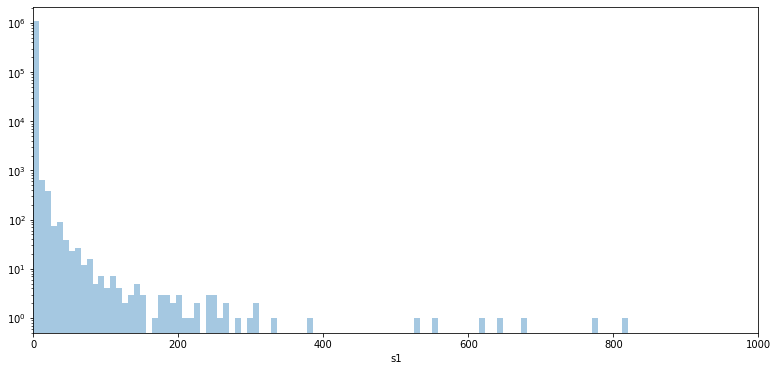

In [30]:
plt.figure(figsize=(13, 6))
xhigh=1000
plt.xlim(0,xhigh)
temp = normalised_pca_cdata[normalised_pca_cdata["s1"]<xhigh]
ax = sns.distplot(temp['s1'],bins=100, kde=False)
ax.set_yscale('log')
plt.show

In [ ]:
# Autoencode

In [33]:
# prepare training data & testing data
# select the data with lower than 25 s1 score to as a normal dataset 
small_s1 = normalised_pca_cdata[normalised_pca_cdata["s1"]<=1]


In [34]:
small_s1.shape

(1048543, 8)

In [35]:
del small_s1["s1"]

In [37]:
X_train, X_test = train_test_split(small_s1, test_size=0.2, random_state=37)

In [38]:
# build the encoder, with 2 layer, tried different activation functions
data_in = Input(shape=(X_train.shape[1],))

encoded = Dense(3,activation='tanh')(data_in)

decoded = Dense(7,activation='softmax')(encoded)

autoencoder = Model(inputs=data_in,outputs=decoded)

autoencoder.compile(optimizer='adam',loss='mean_squared_error', 
                    metrics=['accuracy'])

In [39]:
# train encoder, use a small epochs, did not achieved high accuracy 
autoencoder.fit(X_train, X_train, epochs = 8, batch_size=64,
                validation_data=(X_test,X_test))

Train on 838834 samples, validate on 209709 samples
Epoch 1/8
838834/838834 [==============================] - 21s 25us/step - loss: 0.0247 - acc: 0.7125 - val_loss: 0.0244 - val_acc: 0.7397
Epoch 2/8
838834/838834 [==============================] - 19s 22us/step - loss: 0.0244 - acc: 0.7416 - val_loss: 0.0243 - val_acc: 0.7419
Epoch 3/8
838834/838834 [==============================] - 20s 24us/step - loss: 0.0243 - acc: 0.7461 - val_loss: 0.0243 - val_acc: 0.7445
Epoch 4/8
838834/838834 [==============================] - 20s 24us/step - loss: 0.0243 - acc: 0.7472 - val_loss: 0.0243 - val_acc: 0.7454
Epoch 5/8
838834/838834 [==============================] - 20s 24us/step - loss: 0.0243 - acc: 0.7476 - val_loss: 0.0243 - val_acc: 0.7503
Epoch 6/8
838834/838834 [==============================] - 23s 27us/step - loss: 0.0243 - acc: 0.7478 - val_loss: 0.0243 - val_acc: 0.7482
Epoch 7/8
838834/838834 [==============================] - 20s 23us/step - loss: 0.0243 - acc: 0.7478 - val_loss: 

In [40]:
# use the encoder to reconstruct the orginal dataset 
pca_result = normalised_pca_cdata.drop(["s1"],axis=1)
X_test2 = pca_result.values
pred = autoencoder.predict(X_test2) # the prediction result is a list 

# compare the predicted result with orginal data, and calculate the distance  
import math
s2_list=[]
for i in range(len(pred)):
    s2 = 0
    for j in range(len(pred[i])):
        s2 = (X_test2[i][j]-pred[i][j])**2+s2
    math.sqrt(s2)
    s2_list.append(s2)
    
normalised_pca_cdata["s2"] = s2_list

In [41]:
normalised_pca_cdata.head()

,0,1,2,3,4,5,6,s1,s2
0,0.684644,-0.305740,-0.048537,-0.484217,2.002091,0.085737,-0.015945,2.194313,1.989176
1,5.105808,28.130779,0.259830,-5.870258,-2.550893,30.202362,-26.339824,49.642860,2410.298662
2,-0.010521,0.038406,1.342945,0.129570,1.187078,0.344576,0.206335,1.841829,1.450436
3,0.063579,-0.109537,0.080623,0.042914,1.433037,0.273109,0.274334,1.492590,0.429846
4,8.729668,-1.744492,-0.027706,2.845571,2.136196,-3.383826,-8.332536,13.145082,161.511839
